In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Embedding, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('spam.csv' , encoding='latin1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df.columns = ['target','text']
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


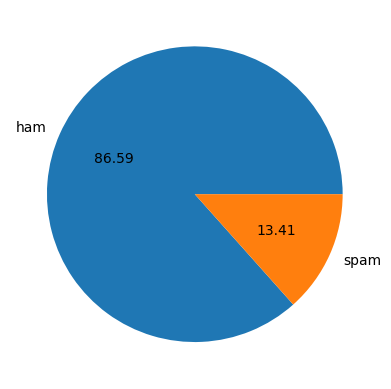

In [4]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [5]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df["target"])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100)
y = df.iloc[:,0].values

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
i = Input(shape=(100,))
x = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=100)(i)
x = LSTM(64)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
112/112 [==============================] - 21s 128ms/step - loss: 0.2468 - accuracy: 0.9201 - val_loss: 0.0680 - val_accuracy: 0.9821
Epoch 2/50
112/112 [==============================] - 7s 66ms/step - loss: 0.0337 - accuracy: 0.9910 - val_loss: 0.0431 - val_accuracy: 0.9854
Epoch 3/50
112/112 [==============================] - 8s 69ms/step - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 4/50
112/112 [==============================] - 8s 72ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.0553 - val_accuracy: 0.9832
Epoch 5/50
112/112 [==============================] - 7s 63ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0633 - val_accuracy: 0.9809
Epoch 6/50
112/112 [==============================] - 8s 72ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0498 - val_accuracy: 0.9888
Epoch 7/50
112/112 [==============================] - 8s 67ms/step - loss: 5.0338e-04 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

35/35 [==============================] - 1s 23ms/step - loss: 0.1348 - accuracy: 0.9830
Test Loss: 0.13475322723388672, Test Accuracy: 0.9829596281051636


In [11]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

35/35 [==============================] - 1s 15ms/step
0.8600758475396251


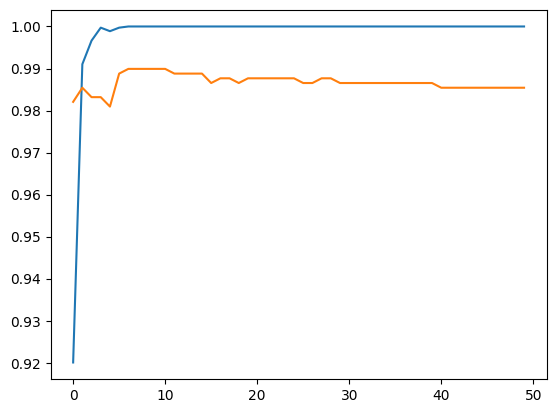

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])